In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
!fc-list :lang=ko

'fc-list'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [12]:
# 한글 폰트
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 경우 "Malgun Gothic" 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 미션1

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",encoding="cp949")

In [6]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [7]:
age = {
    1: '0-4세', 2: '5-9세', 3: '10-14세', 4: '15-19세',
    5: '20-24세', 6: '25-29세', 7: '30-34세', 8: '35-39세',
    9: '40-44세', 10: '45-49세', 11: '50-54세', 12: '55-59세',
    13: '60-64세', 14: '65-69세', 15: '70-74세', 16: '75-79세',
    17: '80-84세', 18: '85세 이상'
}
df['연령대'] = df['연령대코드(5세단위)'].map(age)


In [8]:
df['연령대']

0         60-64세
1         35-39세
2         35-39세
3         55-59세
4         35-39세
           ...  
999995    40-44세
999996    40-44세
999997    55-59세
999998    50-54세
999999    40-44세
Name: 연령대, Length: 1000000, dtype: object

In [9]:
data = df.groupby('연령대').agg({
    '허리둘레': ['count','mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.50), lambda x: x.quantile(0.75)]})
data.columns = ['count', 'mean', 'std', 'min', 'max', '25%', '50%', '75%']

data

,count,mean,std,min,max,25%,50%,75%
연령대,,,,,,,,
20-24세,23244,75.152220,12.251781,47.5,999.0,67.5,73.4,81.0
25-29세,64898,77.704783,16.735734,48.0,999.0,69.0,76.5,84.2
30-34세,77517,81.089268,22.988111,49.0,999.0,72.0,80.1,88.0
35-39세,84621,82.094012,14.522095,9.2,999.0,75.0,82.0,89.0
40-44세,130912,80.488308,10.803098,42.1,999.0,73.0,80.0,87.0
45-49세,118357,80.822449,9.521622,40.0,137.0,74.0,81.0,87.0
50-54세,129833,81.062754,9.095438,6.5,142.0,75.0,81.0,87.0
55-59세,112175,81.799905,8.730398,32.0,139.0,76.0,82.0,87.5
60-64세,106491,82.722769,8.596176,0.0,137.0,77.0,83.0,88.0


In [10]:
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

# 가능한 font list 확인
f = [f.name for f in fm.fontManager.ttflist]
print(f)

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.sans-serif'] = ['/usr/share/fonts/truetype/nanum/NanumGothic.ttf']
plt.rcParams['axes.unicode_minus'] = False

['NanumGothic', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'DejaVu Sans', 'STIXSizeFiveSym', 'cmr10', 'cmmi10', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'cmb10', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'cmsy10', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Sans Display', 'cmtt10', 'STIXGeneral', 'STIXSizeOneSym', 'cmex10', 'HYbsrB', 'Haan Baekje B', 'MDGaesung', 'Bahnschrift', '??????', 'FuturaBlack BT', 'Segoe UI Variable', 'Times New Roman', 'Myanmar Text', 'Courier New', 'Microsoft Himalaya', 'Orbit-B BT', 'OCR-A BT', 'Yu Gothic', 'Segoe UI', 'MSugiHeulim', '??????', 'Yj MAEHWA  SemiBold', 'Yj SHANALL Medium ', 'Yj INITIALPOSITIVE Medium', 'HCR Dotum', 'Microsoft Yi Baiti', 'FZ

# 미션2

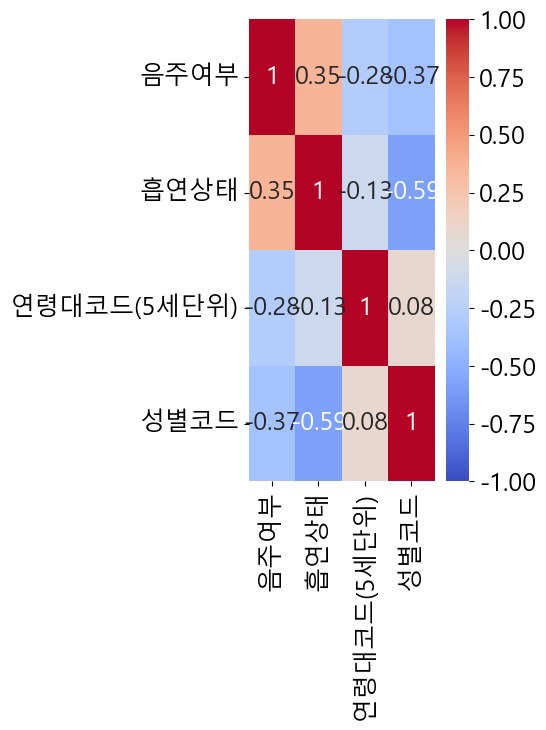

In [13]:
columns = df[['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']]
matrix = columns.corr()
plt.figure(figsize=(3, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

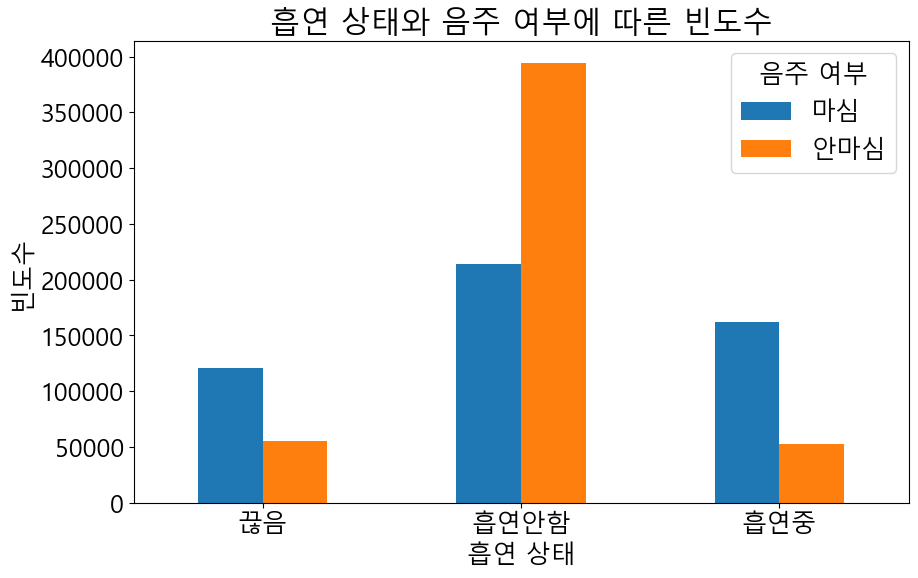

음주여부,마심,안마심
흡연상태,,
끊음,120779,55334
흡연안함,213743,394503
흡연중,162166,52845


In [14]:
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}
df['흡연상태'] = df['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)
cross_tab = pd.crosstab(df['흡연상태'], df['음주여부'])
cross_tab.plot(kind='bar', figsize=(10, 6))
plt.title('흡연 상태와 음주 여부에 따른 빈도수')
plt.ylabel('빈도수')
plt.xlabel('흡연 상태')
plt.xticks(rotation=0)
plt.legend(title='음주 여부')
plt.show()
cross_tab

<Figure size 1500x500 with 0 Axes>

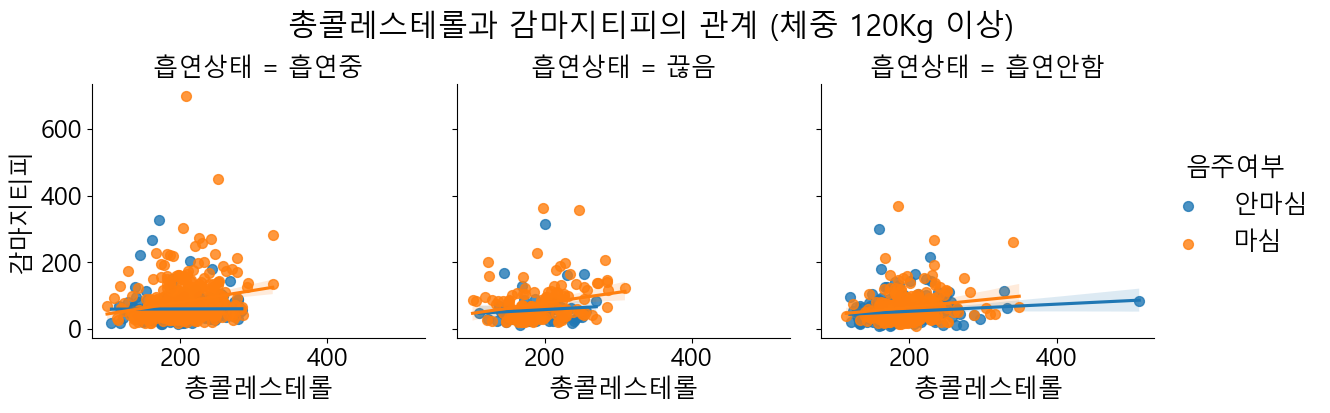

In [15]:
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}

df['흡연상태'] = df['흡연상태'].replace(smoke)

data4 = df[df['체중(5Kg 단위)'] >= 120]
plt.figure(figsize=(15, 5))
sns.lmplot(data=data4, x='총콜레스테롤', y='감마지티피', hue='음주여부', col='흡연상태', fit_reg=True, scatter_kws={'s': 50}, height=4, aspect=1)
plt.suptitle('총콜레스테롤과 감마지티피의 관계 (체중 120Kg 이상)', y=1.05)
plt.show()

C:\Users\utw09\AppData\Local\Temp\ipykernel_14188\1759810498.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['연령대'] = df_filtered['연령대코드(5세단위)'].map(age_group_dict)


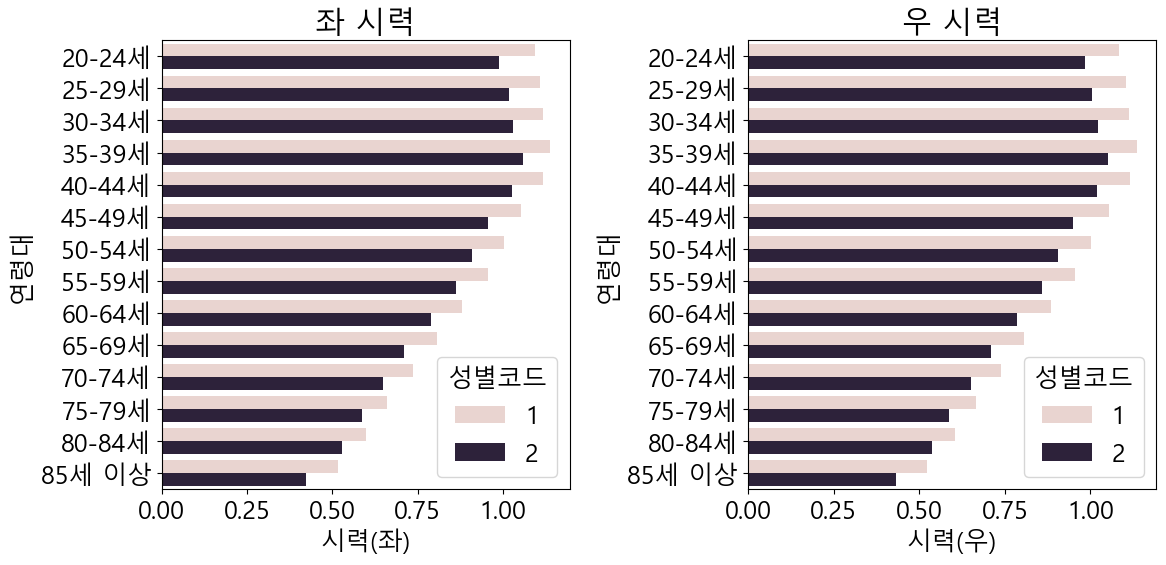

In [16]:

df_filtered = df[(df['시력(좌)'] != 9.9) & (df['시력(우)'] != 9.9)]
age_group_dict = {
    1: '0-4세', 2: '5-9세', 3: '10-14세', 4: '15-19세',
    5: '20-24세', 6: '25-29세', 7: '30-34세', 8: '35-39세',
    9: '40-44세', 10: '45-49세', 11: '50-54세', 12: '55-59세',
    13: '60-64세', 14: '65-69세', 15: '70-74세', 16: '75-79세',
    17: '80-84세', 18: '85세 이상'
}
df_filtered['연령대'] = df_filtered['연령대코드(5세단위)'].map(age_group_dict)
vision_data = df_filtered.groupby(['연령대', '성별코드']).agg({'시력(좌)': 'mean', '시력(우)': 'mean'}).reset_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=vision_data, x='시력(좌)', y='연령대', hue='성별코드', ax=axes[0])
sns.barplot(data=vision_data, x='시력(우)', y='연령대', hue='성별코드', ax=axes[1])

axes[0].set_title('좌 시력')
axes[1].set_title('우 시력')

plt.tight_layout()
plt.show()